Title: 

Levels of Heart Disease by Exploring Resting Blood Pressure (in mm Hg on admission to the hospital), Maximum Heart Rate Achieved and Age

Introduction:
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your report
- Clearly state the question you tried to answer with your project
- Identify and describe the dataset that was used to answer the question

The World Health Organization has estimated that 12 million deaths occur every year worldwide due to the heart diseases. Cardiovascular disease (CVD) is a kind of heart disease that affect the heart and the blood vessels and the way in which blood is pumped and circulated through the body. CVD results in several illness, disability, and death. Medical diagnosis of heart disease is a very important job (Soni et al., 2011). Many scholars undertook projects, algorithms and models to predict the probability of heart disease based on different attributes. Detrano et al. (1989) undertook a project that determine if CAD probabilities in study samples drawn from various ethnic populations with different clinical characteristics can be predicted by a probability algorithm derived from the clinical characteristics. They compared this algorithm with the algorithm of Diamond et al. They concluded that the algorithm is useful when applied to patients who have chest pain syndromes and intermediate disease prevalence. Shah et al. (2020) used the existing dataset from the Cleveland database of UCI repository of heart disease patients to predict the probability of developing heart disease using different algorithms, such as Naïve Bayes, decision tree, K-nearest neighbor, and random forest algorithm. 

Now, we are given a modified version of the UCI Heart Disease dataset. We are given 14 out of 76 attributes, or variables to do a further data analysis for the heart disease. We are given lots of observations from 4 locations, which are Cleveland, Hungarian, Switzerland and VA Long Beach. Shah et al. (2020) used the dataset from the Cleveland database to perform data analysis of heart disease. I would like to use the dataset from the Hungarian database because it also contains sufficient observations. In the 14 variables, 13 out of them are “feature” roles, which means that they are the predictors to predict a class. The “num” variable is the “target” role, which is the class I have to predict. Some of the variables are “integer” type, which means numeric-type variables that can be used for calculations. Some of the variables are “categorial” type, which is equivalent to “factor” type we learnt in the data science course. 

The “num” variable is the class variable in the prediction process. It is the diagnosis of heart disease. In other words, it is the angiographic disease status. There are 2 values in the variable. Value 0 means less than 50% diameter of the vessel narrowing. Value 1 means more than 50% diameter of the vessel narrowing. By using a K-nearest neighbour classification model, I would like to answer the following predictive question: For a given age, resting blood pressure and maximum heart rate achieved, what is the predicted level of heart disease.


Methods & Results:
- Describe in written English the methods you used to perform your analysis from beginning to end that narrates the code the does the analysis.

In the UCI heart disease dataset, I would use “trestbps” (resting blood pressure), “thalach” (maximum heart rate achieved) and “age” (the age of the patient) variables from the UCI Hungarian dataset as the predictors of the classification. The reason why I used them as the predictor variables is that to my knowledge, I believe those 3 variables would significantly affect the diagnosis of heart disease. 

For the data analysis, I would like to use classification model for the prediction. It would be done with the use of k-nearest neighbour algorithm as it does not require any specific shape assumption for the algorithm to perform well. To predict the heart disease, Shah et al. (2020) cited Pouriyeh et al. study that 83.16% accuracy was achieved with value K=9. For the percentage accuracy results of classifcation techniques, the accuracy from the testing set is 78.9% with K=2, and that from the training set is 90.8% with K=7 (Shah et al., 2020). 

Here, I would first split the data into 75% training set and 25% testing set, then I would try to use the training set to create a tuning classification model and find the value of K which has the highest accuracy. After that, I would create the model again but using the k found previously, fit the model into the training data and predict the levels of heart disease using the testing data. Finally, I would find the accuracy of the k-nearest model by looking at the confusion matrix of the data.

Your report should include code which:
- Loads data 

Before loading the data, libraries should be loaded so as to load the functions used for the data analysis.

In [3]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

Now we load the Hungarian data which are comma-separated into the R program, so we use read_csv() function. Since there are no column names in the original table, we add col_names = FALSE parameter to indicate that.

In [9]:
hungarian_original <- read_csv("data/heart_disease/processed.hungarian.data", 
                               col_names = FALSE)
hungarian_original

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
28,1,2,130,132,0,2,185,0,0,?,?,?,0
29,1,2,120,243,0,0,160,0,0,?,?,?,0
29,1,2,140,?,0,0,170,0,0,?,?,?,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,?,?,1
58,0,2,180,393,0,0,110,1,1,2,?,7,1
65,1,4,130,275,0,1,115,1,1,2,?,?,1


- Wrangles and cleans the data to the format necessary for the planned analysis

First of all, we assign the corresponding column names to the data frame based on the UCI website. Then, we found that the data type of most of the columns are incorrect, based on the UCI website, we should mutate every column so that they have the correct data type. After that, we named different diagnosis of heart disease in the “num” column for easier interpretation. Lastly, we removed observations that the required columns (“num”, “age”, “trestbps” and “thalach”) has empty data to ensure empty data, which might affect out data analysis, does not exist.

In [10]:
colnames(hungarian_original) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 
                                  'thalach','exang','oldpeak','slope','ca','thal','num')
hungarian_clean <- hungarian_original |> 
                   mutate(age = as.integer(age), sex = as_factor(sex), cp = as_factor(cp), 
                          trestbps = as.integer(trestbps), chol = as.integer(chol), 
                          fbs = as_factor(fbs), restcg = as_factor(restcg), 
                          thalach = as.integer(thalach), exang = as_factor(exang), 
                          oldpeak = as.integer(oldpeak), slope = as_factor(slope), 
                          ca = as.integer(ca), thal = as_factor(thal), num = as_factor(num)) |>
                   mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),
                          num = fct_recode(num, "<50% Diameter Narrowing" = "0", 
                                                ">50% Diameter Narrowing" = "1")) |>
                   filter(trestbps != "NA") |> 
                   filter(thalach != "NA") |> 
                   filter(num != "NA") |> 
                   filter(age != "NA")
                                                                  
hungarian_clean

Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `trestbps = as.integer(trestbps)`.
Caused by warning:
! NAs introduced by coercion
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>
28,male,2,130,132,0,2,185,0,0,?,NA,?,<50% Diameter Narrowing
29,male,2,120,243,0,0,160,0,0,?,NA,?,<50% Diameter Narrowing
29,male,2,140,NA,0,0,170,0,0,?,NA,?,<50% Diameter Narrowing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,male,4,155,342,1,0,150,1,3,2,NA,?,>50% Diameter Narrowing
58,female,2,180,393,0,0,110,1,1,2,NA,7,>50% Diameter Narrowing
65,male,4,130,275,0,1,115,1,1,2,NA,?,>50% Diameter Narrowing


By filtering, we removed 1 observation that the required columns have empty values. By selecting the required columns, we can perform data analysis (use “age”, “trestbps” and “thalach” to predict “num”)

In [14]:
hungarian <- hungarian_clean |> select(trestbps, thalach, num, age)
hungarian

trestbps,thalach,num,age
<int>,<int>,<fct>,<int>
130,185,<50% Diameter Narrowing,28
120,160,<50% Diameter Narrowing,29
140,170,<50% Diameter Narrowing,29
⋮,⋮,⋮,⋮
155,150,>50% Diameter Narrowing,56
180,110,>50% Diameter Narrowing,58
130,115,>50% Diameter Narrowing,65


- Performs a summary of the data set that is relevant for exploratory data analysis related to the planned analysis 

There are a lot of ways to summarize the data. For example, we can find the number of cases that has <50% Diameter Narrowing and >50% Diameter Narrowing. We can also find the mean “trestbps”, “thalach” and “age” and their median grouped by “num” for comparison.

In [16]:
hungarian_countclass <- hungarian |> 
                        group_by(num) |>
                        summarize(count = n())
hungarian_countclass

hungarian_classstat <- hungarian |> 
                        group_by(num) |>
                        summarize(mean_trestbps = mean(trestbps, na.rm = TRUE), 
                                  mean_thalach = mean(thalach, na.rm = TRUE),
                                  mean_age = mean(age, na.rm = TRUE),
                                  median_trestbps = median(trestbps, na.rm = TRUE), 
                                  median_thalach = median(thalach, na.rm = TRUE),
                                  median_age = median(age, na.rm = TRUE))
hungarian_classstat

num,count
<fct>,<int>
<50% Diameter Narrowing,187
>50% Diameter Narrowing,106


num,mean_trestbps,mean_thalach,mean_age,median_trestbps,median_thalach,median_age
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<50% Diameter Narrowing,130.7326,145.0053,46.88770,130,144,48
>50% Diameter Narrowing,135.8491,128.7642,49.48113,135,129,50


Based on the results, we can see that there are more cases having <50% Diameter Narrowing than >50% Diameter Narrowing. Based on mean and the median, we can see that for >50% Diameter Narrowing, “trestbps” and “age” are generally higher, but “thalach” is generally lower.

- Creates a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis

For data visualization, we could first use the bar graph to compare the number of cases that has <50% Diameter Narrowing and >50% Diameter Narrowing. Since >50% Diameter Narrowing has a higher chance of heart disease, we can focus on data that has >50% Diameter Narrowing and find the distribution of “age”, “thalach” and “trestbps” that might be helpful for data analysis. We use options() function to adjust the plot size to suitable size. A width 7 units and height 6 units would be a suitable size because, when we export or print the report document, the graph won’t be “cropped” because the size is too big. 

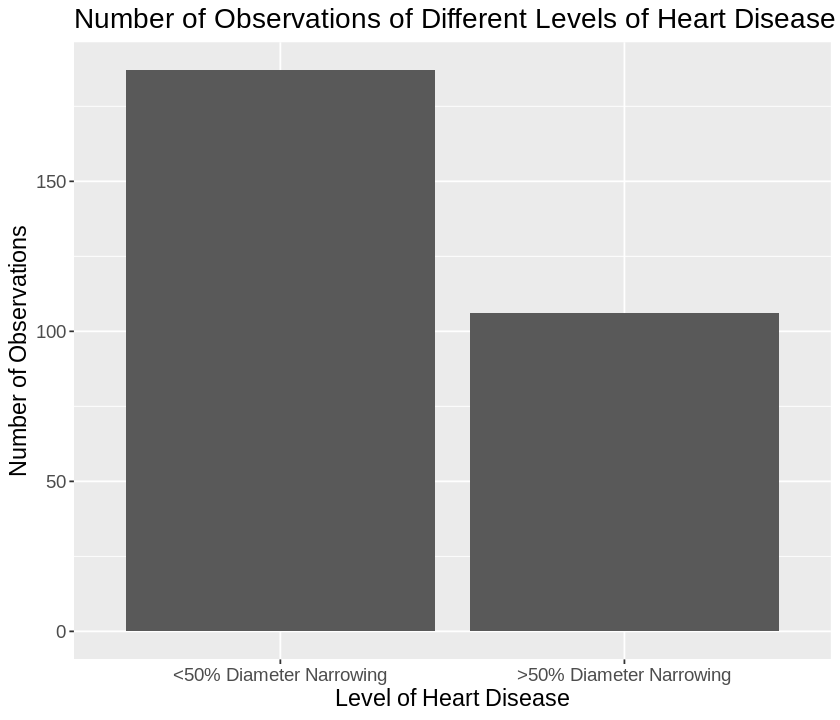

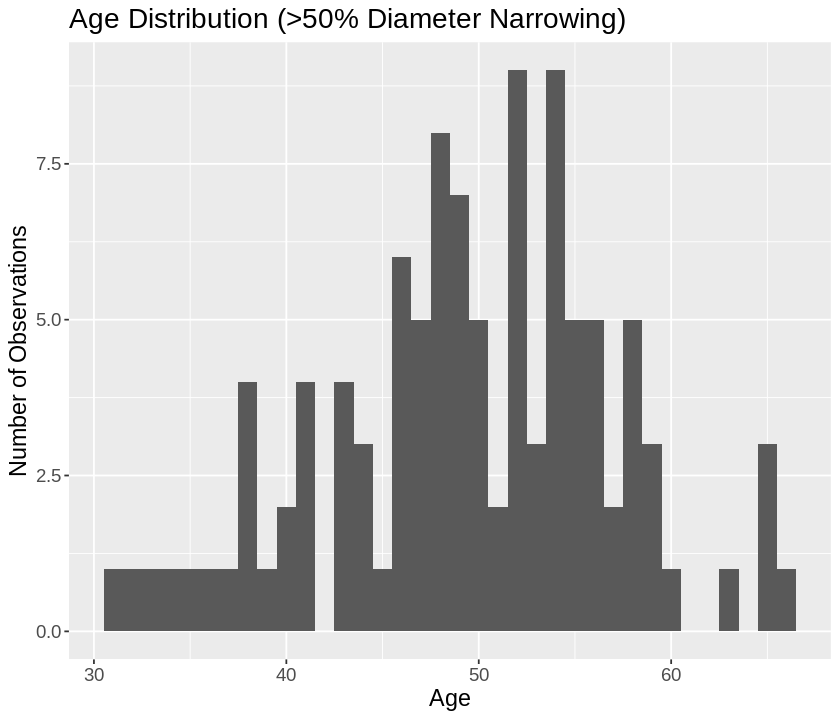

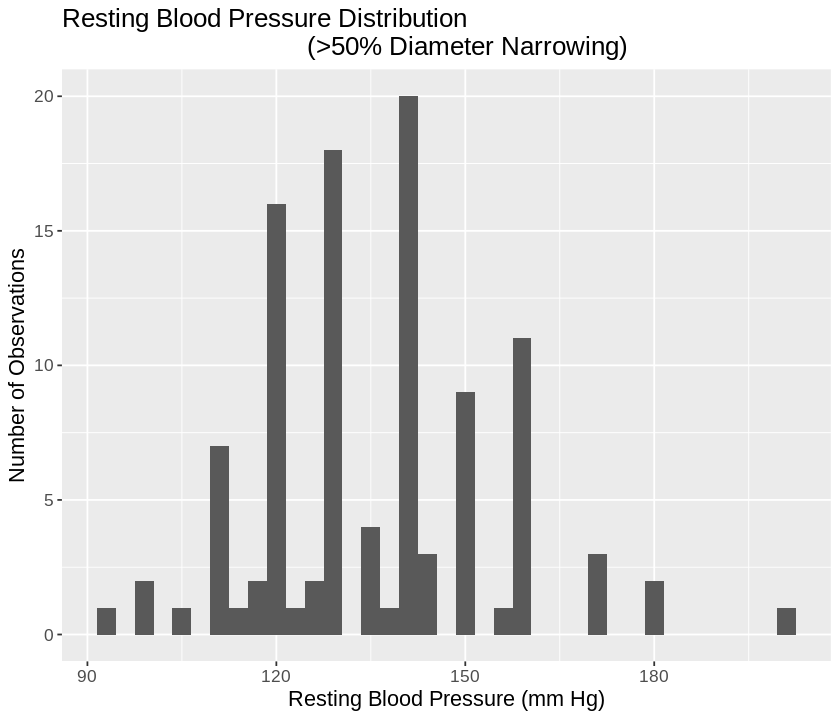

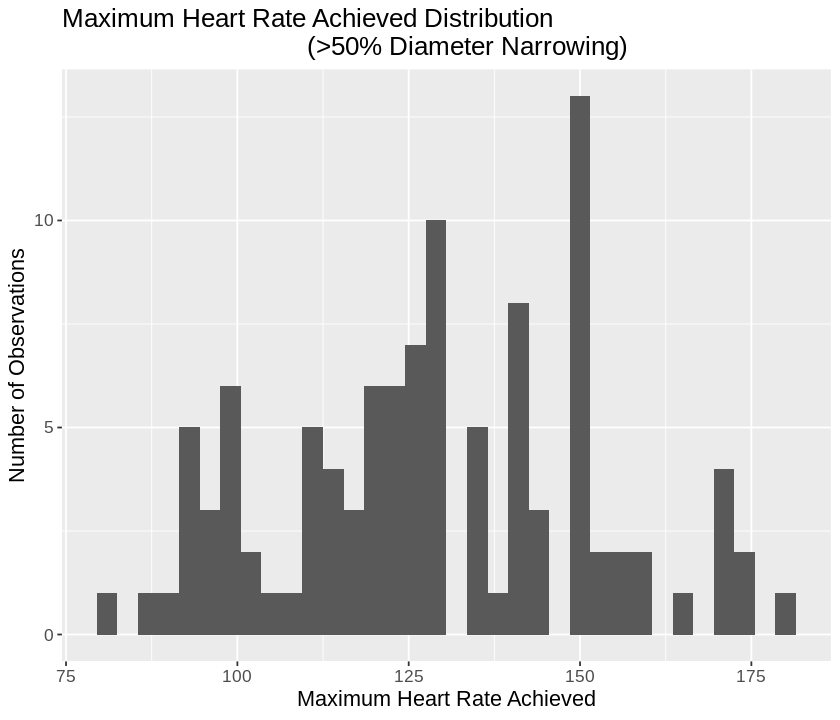

In [51]:
options(repr.plot.width = 7, repr.plot.height = 6)

hungarian_countclass_plot <- ggplot(hungarian_countclass, aes(x = num, y = count)) +
                             geom_bar(stat = "identity") +
                             labs(x = "Level of Heart Disease", y = "Number of Observations",
                                  title = "Number of Observations of Different Levels of Heart Disease") +
                             theme(text = element_text(size = 14))
hungarian_countclass_plot

hungarian_morethan50 <- filter(hungarian, num == ">50% Diameter Narrowing")

hungarian_ageplot <- ggplot(hungarian_morethan50, aes(x = age)) +
                     geom_histogram(binwidth = 1.0) +
                     labs(x = "Age", y = "Number of Observations",
                          title = "Age Distribution (>50% Diameter Narrowing)") +
                     theme(text = element_text(size = 14))
hungarian_ageplot

hungarian_trestbpsplot <- ggplot(hungarian_morethan50, aes(x = trestbps)) +
                     geom_histogram(binwidth = 3.0) +
                     labs(x = "Resting Blood Pressure (mm Hg)", y = "Number of Observations",
                          title = "Resting Blood Pressure Distribution 
                                   (>50% Diameter Narrowing)") +
                     theme(text = element_text(size = 13))
hungarian_trestbpsplot

hungarian_thalachplot <- ggplot(hungarian_morethan50, aes(x = thalach)) +
                     geom_histogram(binwidth = 3.0) +
                     labs(x = "Maximum Heart Rate Achieved", y = "Number of Observations",
                          title = "Maximum Heart Rate Achieved Distribution 
                                   (>50% Diameter Narrowing)") +
                     theme(text = element_text(size = 13))
hungarian_thalachplot

- Performs the data analysis

- Creates a visualization of the analysis 

Discussion:
- Summarize what you found
- Discuss whether this is what you expected to find?
- Discuss what impact could such findings have?
- Discuss what future questions could this lead to?

References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
- Make sure to cite the source of your data as well.

Detrano, R., Jánosi, A., Steinbrunn, W., Pfisterer M., Schmid J., Sandhu S., Guppy K., Lee S., Froelicher V. (1989). International Application of a New Probability Algorithm for the Diagnosis of Coronary Artery Disease. The American Journal of Cardiology, 64(5), 304-310. https://doi.org/10.1016/0002-9149(89)90524-9

Janosi, A., Steinbrunn, W., Pfisterer, M., Detrano, R. (1988). Heart Disease. UC Irving Machine Learning Repository. https://archive.ics.uci.edu/dataset/45/heart+disease

Shah, D., Patel, S. & Bharti, S.K. (2020). Heart Disease Prediction using Machine Learning Techniques. SN Computer Science, 1(345), 1-6. https://doi.org/10.1007/s42979-020-00365-y

Soni, J., Ansari, U., Sharma, D. & Soni, S. (2011). Predictive Data Mining For Medical Diagnosis: An Overview Of Heart Disease Prediction. International Journal of Computer Applications, 17(8), 43-48. https://doi.org/10.5120/2237-2860
